In [1]:
%load_ext autoreload
%autoreload 2

# Preparation

## 1. Data download

We download [RCV1 dataset](https://paperswithcode.com/dataset/rcv1), in particular we use tf-idf representation from [sklearn](https://scikit-learn.org/0.18/datasets/rcv1.html).

Create downloader instance.

In [2]:
from model.dataset import RCV1Downloader

downloader = RCV1Downloader()
downloader

RCV1Downloader [File: /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz; Downloaded: True]

Download the dataset.

In [3]:
%%time

downloader.download()

INFO: Dataset is already downloaded at /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz
CPU times: user 141 µs, sys: 26 µs, total: 167 µs
Wall time: 158 µs


## 2. d-Gap

Load data.

In [4]:
from model.dataset import RCV1Loader

loader = RCV1Loader()
loader

RCV1Loader [File: /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz]

We sort:
 - documents (rows) by decreasing number of distinct terms.
 - terms (columns) by decreasing frequency.

In [5]:
from settings import DATASETS

dataset = DATASETS["tiny"]

data = loader.load(
    docs=dataset.docs, terms=dataset.terms,
    sort_docs=True, sort_terms=True
)

INFO: Loading matrix. 
I/O: Loading /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz. 
INFO: Removing non informative terms. 
INFO: Sorting documents by terms count. 
INFO: Sorting terms by their frequency. 


In [6]:
data

DocumentsCollection[Docs: 10000; Terms: 5170; Nonzero: 110075]

In [7]:
%%time

data.gaps;

INFO: Computing gaps per term


100%|██████████| 10000/10000 [00:00<00:00, 38650.02it/s]

CPU times: user 264 ms, sys: 0 ns, total: 264 ms
Wall time: 266 ms


Plot the total *d*-gap per term.

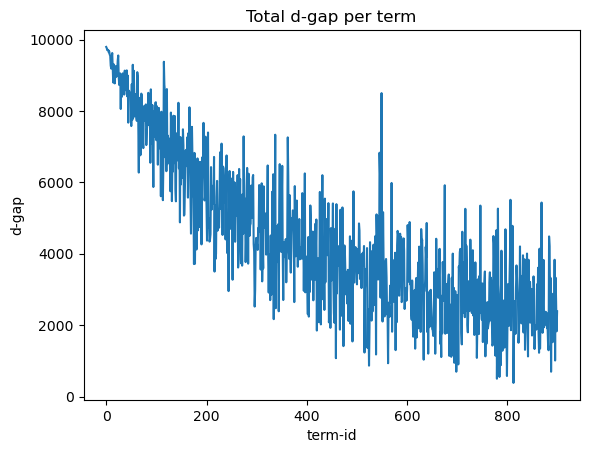

In [8]:
data.plot_tot_d_gap()

Plot the average *d*-gap per term.

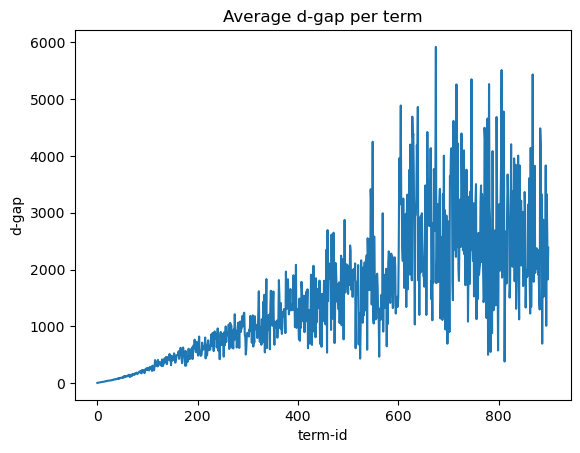

In [9]:
data.plot_avg_d_gap()

Plot the maximum *d*-gap per term.

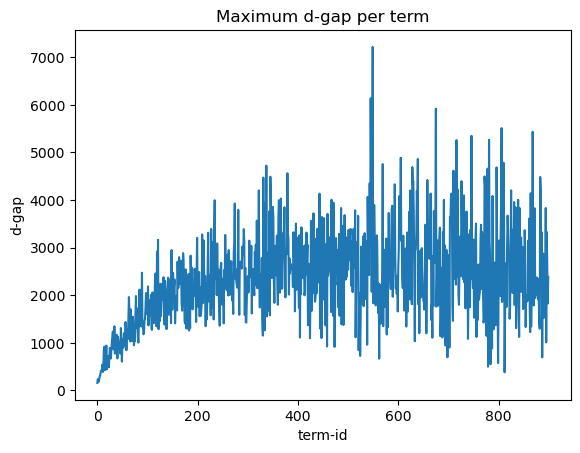

In [10]:
data.plot_max_d_gap()

Overall statistics:

In [11]:
print(f"Total d-gap: {data.tot_d_gap}")
print(f"Average d-gap: {data.avg_d_gap}")
print(f"Maximum d-gap: {data.max_d_gap}")

Total d-gap: 21637604
Average d-gap: 1668.8564324759661
Maximum d-gap: 9633


In [12]:
data.save(name=dataset.name)

INFO: Saving collection information 
I/O: Created directory /home/sebaq/Documents/GitHub/IR_project/dataset/tiny
I/O: Saving /home/sebaq/Documents/GitHub/IR_project/dataset/tiny/info.json 
